# Preliminary Functions

These functions are used throughout the project, so we initialised them at the start.

In this section, we give the implementation details of how we can work with Sudoku in Python.

We need to establish some IO conventions and define a few functions that will be useful throughout this project. The cells of an $n$-Sudoku are labelled by $0,1,\ldots, n^4-1$ where $0,1,\ldots,n^2-1$ is the first row, $n^2,n^2+1,\ldots,2n^2-1$ is the second row, and so on. The first row of the Sudoku is row 0, and first column is column 0. A partial solution to an $n$-Sudoku is a list `X` of length $n^4$, where `X[i]` is the value of the cell $i$, and unassigned values have value 0.

We provide a few Sudoku puzzles that will be used as examples throughout this projects. They are stored in three files named `unique-3x3.tar.gz`, `non-unique-3x3.tar.gz`, `4x4-puzzle.tar.gz` each containing a list of Sudoku puzzles represented as discussed above.

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import math
import gzip
import pickle

with gzip.open("unique-3x3.tar.gz", "rb") as f:
    unique_3x3 = pickle.load(f)

with gzip.open("non-unique-3x3.tar.gz", "rb") as f:
    non_unique_3x3 = pickle.load(f)

with gzip.open("4x4-puzzle.tar.gz", "rb") as f:
    puzzle_4x4 = pickle.load(f)

print(unique_3x3[0])

[5, 3, 0, 2, 0, 0, 0, 0, 9, 0, 0, 0, 0, 0, 9, 0, 0, 0, 2, 0, 0, 0, 4, 3, 0, 8, 0, 4, 0, 0, 0, 0, 0, 8, 5, 0, 0, 0, 6, 4, 0, 0, 7, 0, 0, 7, 9, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 3, 1, 4, 7, 0, 1, 0, 0, 0, 5, 0, 0, 0, 8, 0, 0, 8, 0, 7, 2, 0, 0, 0]


The function `draw_coloured_sudoku` takes a Sudoku `X` and draws it as a graph.

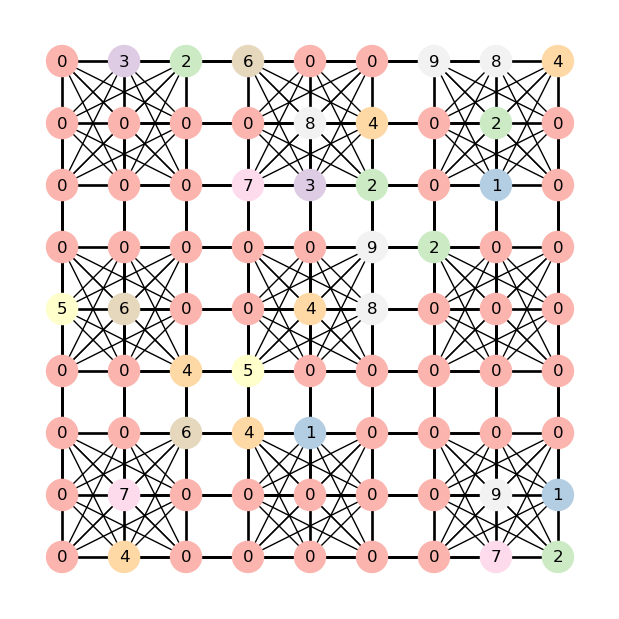

In [2]:
def draw_coloured_sudoku(X):

    # calculates the size of the Sudoku and creates a graph of such size
    n = int(len(X)**(1/4))
    G = nx.sudoku_graph(n)

    mapping = dict(zip(G.nodes(), X))
    pos = dict(zip(list(G.nodes()), nx.grid_2d_graph(n * n, n * n)))

    # we map the nodes 1-9 to a colormap
    low, *_, high = sorted(mapping.values())
    norm = mpl.colors.Normalize(vmin=low, vmax=high, clip=True)
    mapper = mpl.cm.ScalarMappable(norm=norm, cmap=mpl.cm.Pastel1)

    # draw the graph
    plt.figure(figsize=(6, 6))
    nx.draw(
            G,
            labels=mapping,
            pos=pos,
            with_labels=True,
            node_color=[mapper.to_rgba(i) for i in mapping.values()],
            width=1,
            node_size=500,
    )

draw_coloured_sudoku(unique_3x3[1])

It can be useful to change the representation of a $n$-Sudoku from a single list of $n^4$ items to a list of $n^2$ sub-lists of size $n^2$, where each list represents a row. `list_converter` takes a Sudoku in the list form and returns a Sudoku in the list of lists form.

In [3]:
def list_converter(X):
    
    n = len(X)
    a = int(math.sqrt(n))
    
    sudoku_sol_lol = []

    # for each row
    
    for i in range(0, a):
        rows = []
        for m in range(a * i, a * i + a):
            rows.append(X[m])
        sudoku_sol_lol.append(rows)
    
    return sudoku_sol_lol

print(list_converter(unique_3x3[0]))

[[5, 3, 0, 2, 0, 0, 0, 0, 9], [0, 0, 0, 0, 0, 9, 0, 0, 0], [2, 0, 0, 0, 4, 3, 0, 8, 0], [4, 0, 0, 0, 0, 0, 8, 5, 0], [0, 0, 6, 4, 0, 0, 7, 0, 0], [7, 9, 0, 0, 0, 0, 0, 0, 1], [0, 0, 2, 0, 3, 1, 4, 7, 0], [1, 0, 0, 0, 5, 0, 0, 0, 8], [0, 0, 8, 0, 7, 2, 0, 0, 0]]


The function `access(sudoku\_list,row,column)` has inputs a Sudoku `X`, and the position of an element denoted by its `row` and `column`, for example (`row`,`column`) $= (0,0)$ would indicate the top left element. `access` returns a list of three lists, each containing the elements that are in the same row, column, or box as the given element.

In [4]:
def access(X, row, column):

    n = len(X)
    a = int(math.sqrt(n))
    b = int(math.sqrt(a))
    
    # convert the list into a lists of lists where each lists represents a row
    sudoku_ll = list_converter(X)
        
    # obtain row of box
    if row <= a and column <= a:
        # gets the row which is required (1 through n where 1 is the top row and n is the bottom row)
        row_contained = sudoku_ll[row] 
        
        # obtain the column
        column_contained = []
        
        for i in range (0,a):
            # gets the element which is the column value along each list and appends to make a new list the column
            column_contained.append(sudoku_ll[i][column])
            
        # obtain the box which the given element is in 
        box_contained = []
        # find the inital row and column
        row_start = int(row / b) * b 
        col_start = int(column / b) * b 
        
        for i in range(row_start, row_start + b):
            for j in range(col_start, col_start + b):
                box_contained.append(X[i * a + j]) 
                
    return [row_contained, column_contained, box_contained]

print(access(unique_3x3[0],0,0))

[[5, 3, 0, 2, 0, 0, 0, 0, 9], [5, 0, 2, 4, 0, 7, 0, 1, 0], [5, 3, 0, 0, 0, 0, 2, 0, 0]]


We define `checker`, which takes a Sudoku `X` and returns `True` if it is solved and `False` otherwise.

In [5]:
def checker(X):
    n = int((len(X)**0.5))
    flat_sudoku = np.array(X)
    sudoku = np.array([flat_sudoku.reshape(n,n),flat_sudoku.reshape(n,n).transpose()])
    
    for a in sudoku:
        for array in a:
        # check sum,col row
            if not int(np.sum(array)) == 0.5 * n * (n+1):
                return False
        # check uniq row,col
            if not len(set(array)) == n:
                return False

    b = int(math.sqrt(n))
           
    box_list = []
    
    for r in range(0,b): 
        for s in range(0,b): 
            l = access(X,r*b, s*b)
            box_list.append(l[2])
            
            
    for box in box_list:
        if not int(sum(box)) == 0.5 * n * (n+1):
            return False
        if not len(set(box)) == n:
            return False

    return True

print(checker(unique_3x3[0]))

False


The function `check_solver(solver)` takes as a parameter a Sudoku `solver` function and outputs whether it correctly solves the examples provided.

In [6]:
# This function is useful to verify if our solver works.

def check_solver(solver):
    for i in range(len(unique_3x3)):
        if checker(solver(unique_3x3[i])):
            print(f'unique_3x3 {i} has correct solution')
        else:
            print(f'unique_3x3 {i} has wrong solution')
            
    for i in range(len(non_unique_3x3)):
        if checker(solver(non_unique_3x3[i])):
            print(f'non_unique_3x3 {i} has correct solution')
        else:
            print(f'non_unique_3x3 {i} has wrong solution')        

# Naive Sudoku solver

We adapt the backtrack search algorithm to define a function `solver_naive` which solves Sudoku puzzles using backtracking and has the option of checking whether the solution is unique. The function expects the parameter `X`, which represents the initial colouring of a Sudoku puzzle, and returns the completed colouring if a solution exists, otherwise it returns `None`. If uniqueness is checked, the function returns a tuple containing a possible solution and whether it is unique.

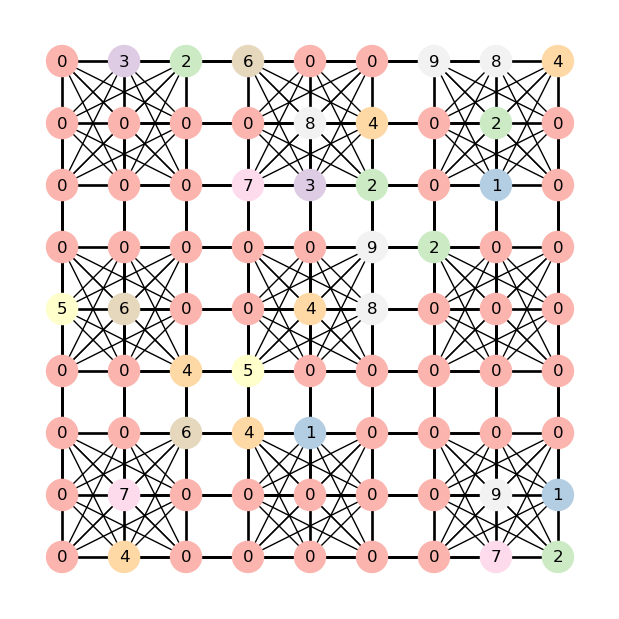

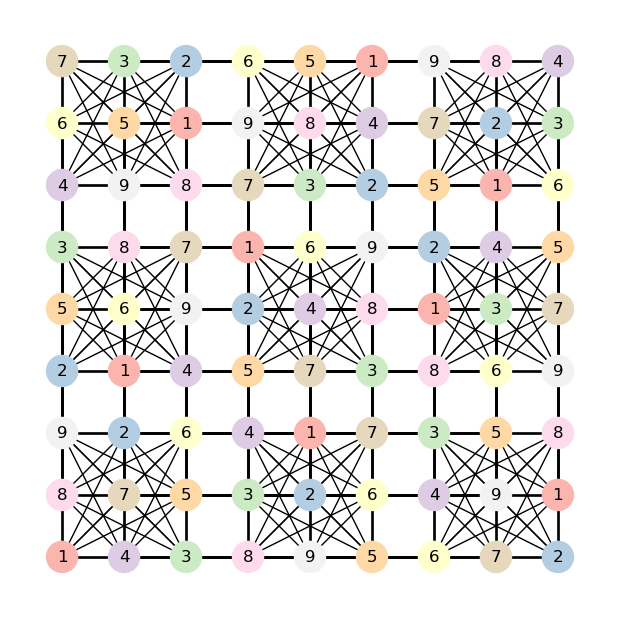

In [7]:
def solver_naive(X, check_uniqueness=False):

    n = len(X)
    G = nx.sudoku_graph(int(n ** 0.25))
    # array for solutions
    solutions = [] 
    k = int(n ** 0.5)

    # dive function
    def dive(v): 
        # checks if all vertecies are coloured
        if v == n: 
            solutions.append(X.copy())
            # continue search if less than 2 sol found
            return len(solutions) < 2

        # skip already coloured vertices
        if X[v] != 0: 
            return dive(v + 1)
        
        # colour assigning loop
        for col in range(1, k + 1): 
            X[v] = col
            # verifies correct solution
            if is_consistent_colouring(G, X, v):
                # If a second solution is found, stop searching
                if not dive(v + 1):  
                    return False
            X[v] = 0

        return True

    dive(0)

    # conditionals for unique solutions
    if check_uniqueness and len(solutions)>1: 
        print("Multiple Solutions. One of solutions:")
        # return first solution
        return (solutions[0], False)  
    elif check_uniqueness:
        # return first solution or None
        return (solutions[0], True) if solutions else None  
    else:
        return solutions[0]

# consistency check
def is_consistent_colouring(G, X, v): 
    for neighbour in G[v]:
        if X[neighbour] == X[v]:
            return False
    return True

draw_coloured_sudoku((unique_3x3[1]))
draw_coloured_sudoku(solver_naive(unique_3x3[1]))

In [8]:
check_solver(solver_naive)

unique_3x3 0 has correct solution
unique_3x3 1 has correct solution
unique_3x3 2 has correct solution
unique_3x3 3 has correct solution
unique_3x3 4 has correct solution
unique_3x3 5 has correct solution
unique_3x3 6 has correct solution
unique_3x3 7 has correct solution
unique_3x3 8 has correct solution
unique_3x3 9 has correct solution
non_unique_3x3 0 has correct solution
non_unique_3x3 1 has correct solution
non_unique_3x3 2 has correct solution
non_unique_3x3 3 has correct solution
non_unique_3x3 4 has correct solution
non_unique_3x3 5 has correct solution
non_unique_3x3 6 has correct solution
non_unique_3x3 7 has correct solution
non_unique_3x3 8 has correct solution
non_unique_3x3 9 has correct solution


# Improved Sudoku solver

An improvement consists in utilising constraints to reduce the space of potential colours for a given vertex. We define a function `solver_improved`, similar to `solver_naive`, which takes a Sudoku puzzle `X` and returns a solution, if one exists. The constraint in the new function is achieved by using `possible_colours(node)`, which takes a vertex and returns a list of its possible colourings. It works by creating a list of the colours of the vertex's neighbours and then the restriction is simply the colours not in that list.

To allow us to investigate if the order in which we choose to colour the vertices makes a difference, we implement a function `select_next_node()`. The main function takes three possible arguments: `default`, `fewest`, and `most`. If the argument is `default`, the next node will be chosen by finding the first uncoloured node. For the remaining options, we first create a dictionary comprising of each non-coloured node and how many possible colourings they have. Then by choosing `fewest` or `most`, we return the node that has the fewest or most number of candidate colours, respectively.

The difference between the new function and the one in Section \ref{se:Naive Sudoku solver} lies in the `dive()` function, where instead of iterating through all possible colours, we only consider the possible colours using the function `possible_colours(node)`. Furthermore, we choose the next node to consider by calling the function `select_next_node()`.

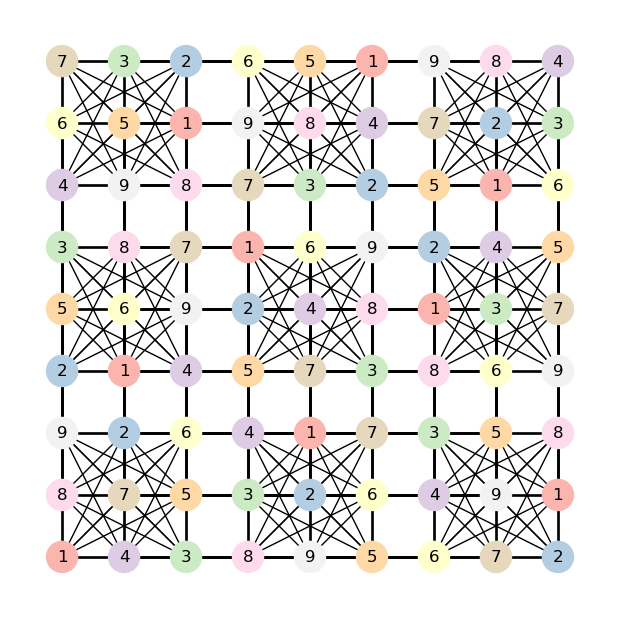

In [9]:
def solver_improved(X, check_uniqueness=False, colouring_order='default'):
    n = int(len(X)**0.25)
    G = nx.sudoku_graph(n)
    # array for solutions
    solutions = []
    # Use the initial coloring
    colours = X.copy()

    def possible_colours(node):
        used = {colours[neighbor] for neighbor in G.neighbors(node) if colours[neighbor] != 0}
        return [color for color in range(1, n*n + 1) if color not in used]

    def select_next_node():
        # Selects the next node based on the colouring_order
        if colouring_order == 'default':
            for node in G.nodes():
                if colours[node] == 0:
                    return node
            return None  # No uncolored nodes left

        # For both fewest and most candidate colours, calculate remaining values
        remaining_values = {node: len(possible_colours(node)) for node in G.nodes() if colours[node] == 0}

        if colouring_order == 'fewest':
            return min(remaining_values, key=remaining_values.get, default=None)
        elif colouring_order == 'most':
            remaining_values_inverted = {key: n*n - remaining_values[key] for key in remaining_values}
            return min(remaining_values_inverted, key=remaining_values.get, default=None)

    def dive():
        if all(colours[node] != 0 for node in G.nodes()):
            solutions.append(colours.copy())
            return len(solutions) < 2

        node = select_next_node()
        if node is None:
            return True

        for color in possible_colours(node):
            colours[node] = color
            if not dive():
                # Stop search if a second solution is found
                return False
            # Reset on backtrack
            colours[node] = 0
        return True

    dive()

    if check_uniqueness and len(solutions) > 1:
        print("Multiple Solutions. One of the solutions:")
        return (solutions[0], False)
    elif check_uniqueness:
        return (solutions[0], True) if solutions else None
    else:
        return solutions[0]
    
    
draw_coloured_sudoku(solver_improved(unique_3x3[1],colouring_order = 'most'))

In [10]:
check_solver(solver_improved)

unique_3x3 0 has correct solution
unique_3x3 1 has correct solution
unique_3x3 2 has correct solution
unique_3x3 3 has correct solution
unique_3x3 4 has correct solution
unique_3x3 5 has correct solution
unique_3x3 6 has correct solution
unique_3x3 7 has correct solution
unique_3x3 8 has correct solution
unique_3x3 9 has correct solution
non_unique_3x3 0 has correct solution
non_unique_3x3 1 has correct solution
non_unique_3x3 2 has correct solution
non_unique_3x3 3 has correct solution
non_unique_3x3 4 has correct solution
non_unique_3x3 5 has correct solution
non_unique_3x3 6 has correct solution
non_unique_3x3 7 has correct solution
non_unique_3x3 8 has correct solution
non_unique_3x3 9 has correct solution


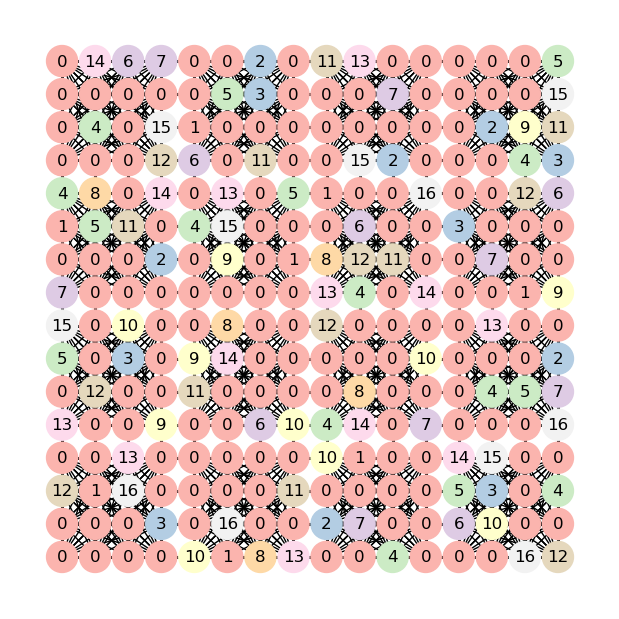

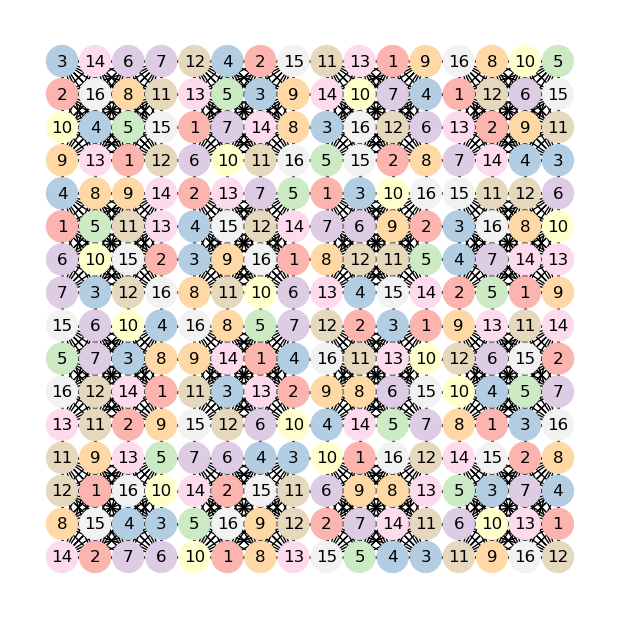

In [11]:
draw_coloured_sudoku(puzzle_4x4)
draw_coloured_sudoku(solver_improved(puzzle_4x4, colouring_order='fewest'))

# Runtimes

We measure the time for the functions `solver_naive` and `solver_improved` to solve all the Sudoku puzzles in our example lists `unique_3x3` and `non_unique_3x3`. For `solver_improved`, we measure the time using all three arguments `fewest`, `default`, and `most` for the order of colouring. Then, we calculate the average time to solve one Sudoku puzzle and plot a bar chart with our results.

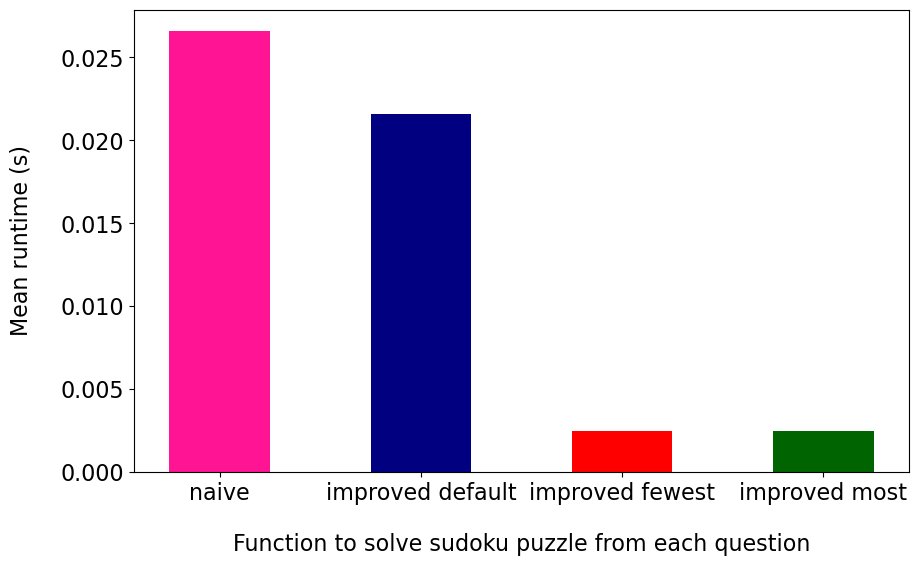

In [12]:
from time import process_time
import matplotlib.pyplot as plt
from statistics import mean
%matplotlib inline

test = unique_3x3 + non_unique_3x3
G = nx.sudoku_graph(3)
time_taken_1 = []
time_taken_2a = []
time_taken_2b = []
time_taken_2c = []

for sudoku in test:

    #1.
    start_time_1 = process_time()
    solver_naive(sudoku)
    end_time_1 = process_time()
    time_taken_1.append(end_time_1 - start_time_1)

    #2a.
    start_time_2a = process_time()
    solver_improved(sudoku, colouring_order='default')
    end_time_2a = process_time()
    time_taken_2a.append(end_time_2a - start_time_2a)

    #2b.
    start_time_2b = process_time()
    solver_improved(sudoku, colouring_order='fewest')
    end_time_2b = process_time()
    time_taken_2b.append(end_time_2b - start_time_2b)

    #2c.
    start_time_2c = process_time()
    solver_improved(sudoku, colouring_order='most')
    end_time_2c = process_time()
    time_taken_2c.append(end_time_2c - start_time_2c)

t_1 = mean(time_taken_1)
t_2a = mean(time_taken_2a)
t_2b = mean(time_taken_2b)
t_2c = mean(time_taken_2c)

times = {'naive': t_1, 'improved default': t_2a,'improved fewest': t_2b,'improved most': t_2c}
Q = list(times.keys())
time_values = list((times.values()))
colours = {"#006400", "#FF0000", "#FF1493", "#000080"}
fig = plt.figure(figsize = (10,6))
plt.rcParams.update({'font.size': 16})

plt.bar(Q, time_values, color = colours, width = 0.5)
plt.xlabel("Function to solve sudoku puzzle from each question",labelpad=20)
plt.ylabel("Mean runtime (s)", labelpad=20)
plt.show()

# Appendix 1

This section expands on ideas on 'essentially different' Sudoku. Whilst the the total number of Sudoku is extremely large, this can be massively reduced by considering two Sudoku 'morphs', whose definition is declared below.

There are a number of operations that can be performed on an $n$-Sudoku $X$ which leave it as a valid Sudoku. Here are three of them:

1. We can permute the values: if $f$ is a permutation of $\{1,2,...,n^2\}$, then applying $f$ to each value in a cell in $X$ gives another valid Sudoku.
2.  We can permute rows and/or columns within a "band" or "stack", where a band is a "row of boxes", and a stack is a "column of boxes". For example, in a 3-Sudoku we can swap rows 0 and 1, or 0 and 2, but not necessarily rows 0 and 3; similarly, we could "rotate" the three middle columns $3 \to 4 \to 5 \to 3$.
3.  We can transpose the Sudoku.

We define a morph of $X$ to be an $n$-Sudoku obtained by applying some combination of these operations.

The function `to_matrix` takes a Sudoku `X` and returns its `numpy` matrix representation. Then the functions `row_perm` and `column_perm` take a Sudoku in the matrix form `M` and the parameter `order` and return a Sudoku in the matrix form with the new `order`. The parameter `order` is expected to be a list representing the $r$-cycle permutation of the row or columns. For example, if we want to swap the middle columns $3 \to 4 \to 5 \to 3$ of a 3-Sudoku, then we set `order = [0,1,2, 5,3,4, ,6,7,8]`. The function `transpose` takes a Sudoku in the matrix form `M` and the boolean parameter `marker` and return the transpose of `M` if `marker = True`, otherwise returns `M`. Finally, the function `element_perm` takes a Sudoku `X` and the parameter `order` as described above to permute each of the elements in the Sudoku.

In [13]:
import itertools as it

def to_matrix(X):
    n = int(np.sqrt(len(X)))
    # convert the list into array and reshape the array into a 'matrix' form
    return np.array(X).reshape(n, n)

def row_perm(M, order):
    # change the order of the rows 
    return M[order]

def column_perm(M, order):
    # change the order of the columns
    return M[:,order]

def transpose(M, marker):
    if marker:
        # transpose the Sudoku
        M = np.transpose(M)
    return M

def element_perm(X, order):
    # elements are 1 to 9 while indices are 0 to 8 so reduce by 1 to match indices
    X = [x-1 for x in X]
    # identity r-cycle
    original =  np.array([x for x in range(len(order))])
    # reduce items by 1 to match indices
    order = np.array([x-1 for x in order])

    # calculates by how much we need to increase or decrease
    swapby = order - original

    # inc / dec all elements by the necessary amount
    for i in range(len(X)):
        X[i] += swapby[X[i]]
        i += 1
    
    return([x+1 for x in X])


def to_list(M):
    # converts back the array to list
    return M.ravel().tolist()

We may generate a morph using a combination of these operations. For example, consider a 3-Sudoku and apply the operations as described in our earlier example.

In [14]:
X = [5, 4, 9, 1, 3, 6, 8, 2, 7, 
      2, 6, 7, 5, 8, 9, 3, 4, 1, 
      3, 8, 1, 4, 2, 7, 5, 9, 6, 
      7, 1, 4, 8, 9, 2, 6, 5, 3, 
      9, 3, 5, 6, 4, 1, 7, 8, 2, 
      8, 2, 6, 3, 7, 5, 9, 1, 4, 
      6, 9, 3, 2, 5, 4, 1, 7, 8, 
      1, 5, 2, 7, 6, 8, 4, 3, 9, 
      4, 7, 8, 9, 1, 3, 2, 6, 5]
M = to_matrix(X)
# Swap rows 1,2 and 6,8
M = row_perm(M, [0,2,1, 3,4,5, 8,7,6])
# Swap columns 3,4
M = column_perm(M, [0,1,2, 4,3,5, 6,7,8])
# Transpose the result
M = transpose(M, True)
X = to_list(M)
# Permuting the values 4,2,5,4
X_morph = element_perm(X,[1,5,3,2,4,6,7,8,9])
print(X_morph)

[4, 3, 5, 7, 9, 8, 2, 1, 6, 2, 8, 6, 1, 3, 5, 7, 4, 9, 9, 1, 7, 2, 4, 6, 8, 5, 3, 3, 5, 8, 9, 2, 7, 1, 6, 4, 1, 2, 4, 8, 6, 3, 9, 7, 5, 6, 7, 9, 5, 1, 4, 3, 8, 2, 8, 4, 3, 6, 7, 9, 5, 2, 1, 5, 9, 2, 4, 8, 1, 6, 3, 7, 7, 6, 1, 3, 5, 2, 4, 9, 8]


Generation of morphs is one face of the coin. We now create a function that detects whether two Sudoku are morphs.

So far, we allowed our functions to accept any parameter `order` and we made sure the operation was valid by manually checking. When detecting, we need to make sure the operations are valid. We define a function `possible_perms(n)` that creates all the "legal" `order` for row and column permutations of a `n`-Sudoku.

The function `all_perms(M)` takes a Sudoku in matrix form $`M`$ and uses the operations we defined (apart from the permutation of elements) to return all the possible morphs.

In [15]:
def possible_perms(n):
    
    # generate a list of n-lists where each inner list contains n indices
    indices = [list(range(i*n, (i+1)*n)) for i in range(n)]
    # permute inside the inner lists since these are the allowed permutations
    perms = [list(it.permutations(nums)) for nums in indices]
    # calculate the cartesian product for the permutations
    L = np.array(list(it.product(*perms)))
    # flatten and return a list of the orders we can use in the permutation functions
    return L.reshape(-1, n*len(indices[0])).tolist()

def all_perms(M):
    num = possible_perms(int(np.sqrt(len(M))))
    # produce all the possibilities for a single Sudoku 
    # first transposing, then row perms, then column perms
    for marker in [True,False]:
        res0 = transpose(M,marker)
        for orders in num:
            res1 = row_perm(res0,orders)
            for orders in num:
                res2 = column_perm(res1,orders)
                yield res2

We could now detect if two Sudokus are morphs, provided there is no value permutation involved. We still need to include the possibilities from permuting values. To avoid the factorial cases, we define a function `position_matrices(M)` to produce $n^2$ so called "position matrices".

In [16]:
def position_matrices(M):
    
    positions = []
    # produce the 'truth-table' matrices for every number in the Sudoku
    for i in range(1, len(M)+1):
        pos = (M == i)
        positions.append(pos)
        
    return positions

position_matrices(np.array([[1,2],
                            [1,2]]))


[array([[ True, False],
        [ True, False]]),
 array([[False,  True],
        [False,  True]])]

Finally, `comparison(U,V)` takes two $n$-Sudoku and returns whether they are morphs. The function first generates all the possible permutations of the position matrices for `U` and then it compares them to the position matrices for `V`. If there is an overlap, then the functions returns `True`, otherwise it returns `False`.

In [17]:
def comparison(U,V):
    # convert to matrices
    X = to_matrix(U)
    Y = to_matrix(V)

    # all permutations for all position matrices for the Sudoku X (= all possibilities)
    x_possibilities = [list(all_perms(x)) for x in position_matrices(X)]

    # position matrices for the Sudoku Y
    y_pos = position_matrices(Y)

    # initialize the dive-indices as ALL of possibilities
    dive = range(len(x_possibilities[0]))
    
    # check the x_possibilities, for the dive indices, if any member of Y's position matrices matches one of them
    for xpos in x_possibilities:
        indices = [i for i in dive 
                        if any(np.array_equal(xpos[i], member_y) for member_y in y_pos)]
        if not indices:
            return False
        # upate the dive indices and go back to the loop with restricted solutions
        dive = indices.copy()
    
    # return True if there is a possibility that is identical where all of Y's position matrices match
    return True

In [18]:
print(comparison(X,X_morph))
print(comparison(X,unique_3x3[1]))

True
False
